# Анализ сервиса аренды самокатов GoFast

Общее описание проекта 

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra абонентская плата
    - 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

## Цели и задачи исследования

**Целью проекта** является анализ данных: 

- Частота встречаемости городов;

- Соотношение пользователей с подпиской и без подписки;

- Возраст пользователей;

- Расстояние, которое пользователь преодолел за одну поездку;

- Продолжительность поездок.

И проверка гипотез, которые могут помочь бизнесу:
- Тратят ли пользователи с подпиской больше времени на поездки?
    - Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
    - Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- Количество обращений до и после обновления
    - Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    
В рамках достижения целей проекта должны быть решены следующие **задачи**:
- Исследована общая информация о датафреймах
- Выполнена предобработка данных
    - Обработка пропущенных значений
    - Обработка неявных дубликатов
    - Обработка явных дубликатов
    - Изменение типов данных
    - Создание нового столбца с номером месяца на основе столбца date
- Выполнен исследовательский анализ данных
- Осуществлено объединение данных
- Подсчет выручки
- Осуществлена проверка гипотез
- Оформлен общий вывод и рекомендации для заказчика

В качестве **исходных данных** выступают три источника, предоставленные заказчиком:
- Пользователи — users_go.csv
- Поездки — rides_go.csv
- Подписки — subscriptions_go.csv

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

## Оглавление

1. [Шаг 1. Импорт библиотек](#Шаг-1.-Импорт-библиотек)
2. [Шаг 2. Загрузка данных](#Шаг-2.-Загрузка-данных)
3. [Шаг 3. Общая информация о каждом датафрейме](#Шаг-3.-Общая-информация-о-каждом-датафрейме)
4. [Шаг 4. Предобработка данных](#Шаг-4.-Предобработка-данных)
5. [Шаг 5. Исследовательский анализ данных](#Шаг-5.-Исследовательский-анализ-данных)
6. [Шаг 6. Объединение данных](#Шаг-6.-Объединение-данных)
7. [Шаг 7. Подсчёт выручки](#Шаг-7.-Подсчёт-выручки)
8. [Шаг 8. Проверка гипотез](#Шаг-8.-Проверка-гипотез)
9. [Шаг 9. Распределения](#Шаг-9.-Распределения) (не выполнено)
10. [Общий вывод](#Общий-вывод)


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 1. Импорт библиотек
[К оглавлению](#Оглавление)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import matplotlib.pyplot as plt
from IPython.display import display

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 2. Загрузка данных
[К оглавлению](#Оглавление)

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 3. Общая информация о каждом датафрейме
[К оглавлению](#Оглавление)

#### Описание исходных данных
[К оглавлению](#Оглавление)

Описание исходных данных, предоставленное заказчиком:

**Пользователи** — `users_go.csv`:
- `user_id` уникальный идентификатор пользователя
-  `name` имя пользователя
- `age`	возраст
- `city` город
- `subscription_type` тип подписки (free, ultra)

**Поездки** — `rides_go.csv`
- `user_id`	уникальный идентификатор пользователя
- `distance` расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` дата совершения поездки

**Подписки** — `subscriptions_go.csv`
- `subscription_type` тип подписки
- `minute_price` стоимость одной минуты поездки по данной подписке
- `start_ride_price` стоимость начала поездки
- `subscription_fee` стоимость ежемесячного платежа

#### Функция вывода информации о датафрейме
[К оглавлению](#Оглавление)

In [3]:
#Разработаем функцию, которая выводит общую информацию о датафрейме
def data_info (data):
    print('\nОбщая информация о датафрейме .head()\n')
    display(data.head(10))
    print('\nОбщая информация о датафрейме .info()\n')
    display(data.info())
    print('\nОбщая информация о датафрейме .describe()\n')
    display(data.describe())
    print('\nОбщая информация о датафрейме .hist()\n')
    data.hist(color='blue', figsize=(15, 5))
    plt.show()

#### users_go.csv
[К оглавлению](#Оглавление)


Общая информация о датафрейме .head()



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None


Общая информация о датафрейме .describe()



,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000



Общая информация о датафрейме .hist()



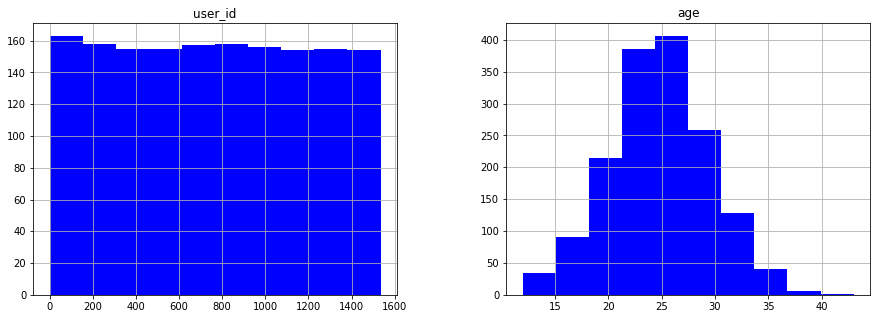

In [4]:
data_info(users_go)

##### Выводы по разделу
[К оглавлению](#Оглавление)

Описание столбцов:
1. Наименования столбцов соответствуют описанию. 
2. Наименования столбцов составлены должным образом.

Предварительное исследование пропусков в данных:
1. Пропуски данных отсутствуют.

Исследование типов данных: 
1. `user_id` (int64) - формат данных соответствует
2. `name` (object) - формат данных соответствует
3. `age` (int64) - формат данных соответствует
4. `city` (object) - формат данных соответствует
5. `subscription_type` (object) - формат данных соответствует

Предварительное исследование значений столбцов:
1. В столбце `user_id` максимальное значение - `1534`, хотя общее количество строк - `1565`. Данный датафрейм содержит информацию о пользователях, id присваевается как порядковый номер. Возможно, имеются дубликаты, проверить.
2. Столбец `age` не имеет выбросов, значения адекватные

#### rides_go.csv
[К оглавлению](#Оглавление)


Общая информация о датафрейме .head()



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None


Общая информация о датафрейме .describe()



,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963



Общая информация о датафрейме .hist()



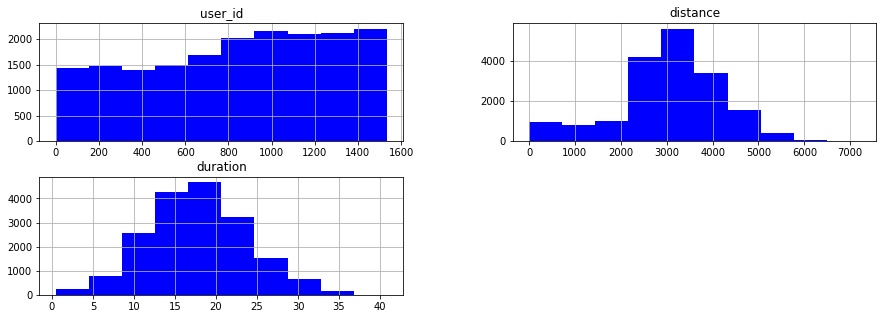

In [5]:
data_info(rides_go)

##### Выводы по разделу
[К оглавлению](#Оглавление)


Описание столбцов:
1. Наименования столбцов соответствуют описанию. 
2. Наименования столбцов составлены должным образом.

Предварительное исследование пропусков в данных:
1. Пропуски данных отсутствуют.

Исследование типов данных: 
1. `user_id` (int64) - формат данных соответствует
2. `distance` (float64) - формат данных соответствует
3. `duration` (float64) - формат данных соответствует
4. `date` (object) - привести формат к типу данных pandas

Предварительное исследование значений столбцов:
1. В столбце `user_id` также максимальное значение - `1534`
2. Столбец `distance` не имеет выбросов, значения адекватные
3. Столбец `duration` не имеет выбросов, значения адекватные

#### subscriptions_go.csv
[К оглавлению](#Оглавление)


Общая информация о датафрейме .head()



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None


Общая информация о датафрейме .describe()



,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000



Общая информация о датафрейме .hist()



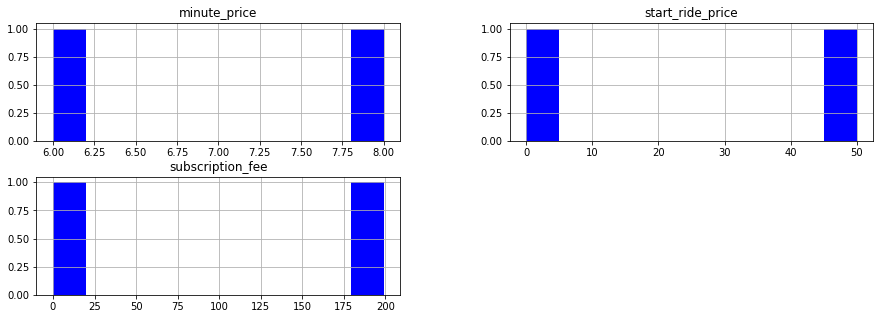

In [6]:
data_info(subscriptions_go)

##### Выводы по разделу
[К оглавлению](#Оглавление)

Описание столбцов:
1. Наименования столбцов соответствуют описанию. 
2. Наименования столбцов составлены должным образом.

Предварительное исследование пропусков в данных:
1. Пропуски данных отсутствуют.

Исследование типов данных: 
1. `subscription_type` (object) - формат данных соответствует
2. `minute_price` (int64) - формат данных соответствует
3. `start_ride_price` (int64) - формат данных соответствует
4. `subscription_fee` (int64) - формат данных соответствует

Предварительное исследование значений столбцов:
1. Столбец `minute_price` не имеет выбросов, значения адекватные
2. Столбец `start_ride_price` не имеет выбросов, значения адекватные
3. Столбец `subscription_fee` не имеет выбросов, значения адекватные

#### Выводы по главе
[К оглавлению](#Оглавление)

Описание столбцов:
1. Наименования столбцов соответствуют описанию. 
2. Наименования столбцов составлены должным образом.

Предварительное исследование пропусков в данных:
1. Пропуски данных отсутствуют.

Исследование типов данных: 
1. `date` (object) - привести формат к типу данных pandas

Предварительное исследование значений столбцов:
1. В данных не имеется выбросов и каких-либо аномальных значений

Выявлены общие столбцы для объединения данных:
1. `users_go` и `rides_go`
    - user_id
2. `users_go` и `subscriptions_go`
    - subscription_type

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 4. Предобработка данных
[К оглавлению](#Оглавление)

#### Обработка пропущенных значений
[К оглавлению](#Оглавление)

In [7]:
print('\nКоличество пропусков в датафрейме users_go\n', users_go.isna().sum())
print('\nКоличество пропусков в датафрейме rides_go\n', rides_go.isna().sum())
print('\nКоличество пропусков в датафрейме subscriptions_go\n', subscriptions_go.isna().sum())


Количество пропусков в датафрейме users_go
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Количество пропусков в датафрейме rides_go
 user_id     0
distance    0
duration    0
date        0
dtype: int64

Количество пропусков в датафрейме subscriptions_go
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


##### Выводы по разделу
[К оглавлению](#Оглавление)

Пропусков не выявлено

#### Обработка явных дубликатов
[К оглавлению](#Оглавление)

Проверим наличие неявных дубликатов во всех данных

In [8]:
print('\nКоличество дубликатов в датафрейме users_go\n', users_go.duplicated().sum())
print('\nКоличество дубликатов в датафрейме rides_go\n', rides_go.duplicated().sum())
print('\nКоличество дубликатов в датафрейме subscriptions_go\n', subscriptions_go.duplicated().sum())


Количество дубликатов в датафрейме users_go
 31

Количество дубликатов в датафрейме rides_go
 0

Количество дубликатов в датафрейме subscriptions_go
 0


Как и было отмечено при ознакомлении с данными, обнаружены дубликаты.

Удалим такие строки

In [9]:
users_go.drop_duplicates(inplace=True)

##### Выводы по разделу
[К оглавлению](#Оглавление)

Были обнаружены и удалены дубликаты в датафрейме `users_go`

#### Обработка неявных дубликатов
[К оглавлению](#Оглавление)

Проверим некоторые столбцы данных на наличие неявных дубликатов и других дефектов в данных, которые могут быть выявлены методом unique()

In [10]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [11]:
users_go['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [12]:
subscriptions_go['minute_price'].unique()

array([8, 6])

In [13]:
subscriptions_go['start_ride_price'].unique()

array([50,  0])

In [14]:
subscriptions_go['subscription_fee'].unique()

array([  0, 199])

##### Выводы по разделу
[К оглавлению](#Оглавление)

Неявных дубликатов не обнаружено.

#### Изменение типов данных
[К оглавлению](#Оглавление)

##### Привести столбец date к типу даты pandas
[К оглавлению](#Оглавление)

In [15]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d')

#### Создать новый столбец с номером месяца на основе столбца date
[К оглавлению](#Оглавление)

Проверим, за какие годы предоставлены данные

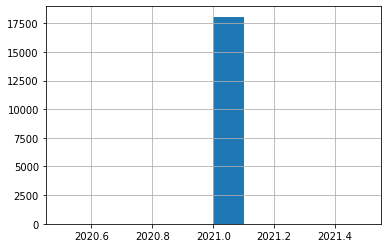

array([2021])

In [16]:
rides_go['date'].dt.year.hist()
plt.show()
rides_go['date'].dt.year.unique()

Так как данные только за 2021 год, пересечения с другими годами не будет.

In [17]:
#создадим новый столбец и выведем его первые 5 строк 
rides_go['month'] = rides_go['date'].dt.month 
rides_go['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

##### Выводы по разделу
[К оглавлению](#Оглавление)

Был создан новый столбец `month` в датафрейме `rides_go` с номером месяца
Измененение других типов не требуется

#### Выводы по главе
[К оглавлению](#Оглавление)

Выполнена предобработка данных:
- Обработка пропущенных значений
    - пропущенных значений не обнаружено
- Обработка неявных дубликатов
    - неявных дубликатов не обнаружено
- Обработка явных дубликатов
    - удалены явные дубликаты в users_go
- Изменение типов данных
    - изменен столбец date к типу даты pandas
    - в иных столбцах изменение типа данных не требуется
- Создание нового столбца с номером месяца на основе столбца date
    - задача выполнена

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 5. Исследовательский анализ данных
[К оглавлению](#Оглавление)

Разработаем функции для анализа категориальных и числовых данных

In [18]:
def analyze_category(data, column, title, x_label, y_label):
    
    #Функция выводит основную информацию о пользователях по категориям:
    #сводную таблицу с группировкой по user_id
    #На вход подаётся датафрейм и исследуемый столбец
    #Например (users_go, 'city')
    
    
    #создадим сводную таблицу
    pivot_table = data.pivot_table(index=column, values='user_id', aggfunc=['count'])
    pivot_table.columns = ['Число пользователей']
    pivot_table = pivot_table.sort_values(by='Число пользователей', ascending = False)
    display(pivot_table)  
    if((column != 'city') and (column != 'age')):
    # выводим диаграмму круговую
        plt.pie(pivot_table['Число пользователей'],
            labels = pivot_table.index,
            colors=sns.color_palette('Spectral'),
            radius=2,
            autopct='%.1f%%',
            textprops={'size': 'medium'},) 
        plt.title(title, pad=100)
        plt.show()
    
    #выводим столбчатую диаграмму
    pivot_table.plot(kind='bar',figsize = (15,7), color='Orange')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show() 

In [19]:
def analyze_number(data, column_1, column_2, column_3, title, x_label, y_label):
    
    #Функция предназначена для исследования числовых значений
    #На вход подаётся датафрейм и исследуемые столбцы
    #Например (rides_go, 'user_id', 'distance', 'month')

    #вычислим основные показатели столбца: максимальное значение, минимальное, среднее, медианное
    print('\nМаксимальное значение: ', round(data[column_2].max(),2))
    print('\nМинимальное значение: ', round(data[column_2].min(),2))
    print('\nСреднее значение: ', round(data[column_2].mean(),2))
    print('\nМедианное значение: ', round(data[column_2].median(),2))
   
    print('\nГистограмма')
    #выводим гистограмму
    sns.histplot(data=data,
                 x=column_2,
                 bins=50,
                 kde = True,
                 color = 'Green')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print('Диаграмма размаха')
    #выводим диаграмму размаха
    sns.boxplot(x=data[column_2], palette="Blues")
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()
    #составим сводную  таблицу
    pivot_table = data.pivot_table(index=column_1, values=column_2, aggfunc=['count', 'mean'])
    pivot_table.columns = ['Количество поездок', 'Среднее']
    #форматируем вывод таблиц
    pd.options.display.float_format = '{:.2f}'.format
    #выводим таблицы на экран
    print('\nТоп 5 лидеров по среднему значению')
    display(pivot_table.sort_values(by='Среднее', ascending = False).head(5))
    print('\nТоп 5 антилидеров по среднему значению')
    display(pivot_table.sort_values(by='Среднее', ascending = True).head(5))
    
    print('\nРаспределение средних значений в зависимости от месяца')
    #составим сводную  таблицу
    pivot_table = data.pivot_table(index=column_3, values=column_2, aggfunc=['count', 'mean'])
    pivot_table.columns = ['Количество поездок', 'Среднее']
    #выводим таблицы на экран
    display(pivot_table.sort_values(by='Среднее', ascending = False).head(12))

#### Частота встречаемости городов
[К оглавлению](#Оглавление)

,Число пользователей
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


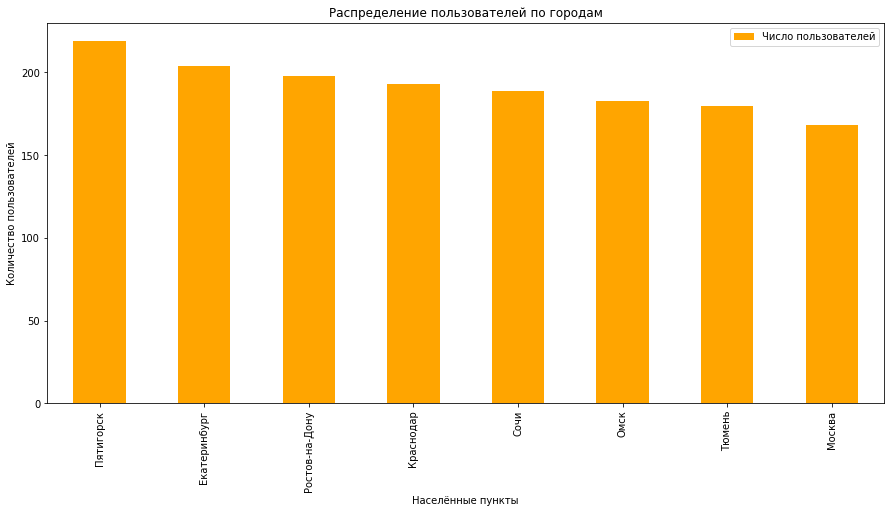

In [20]:
analyze_category(users_go, 'city', 'Распределение пользователей по городам', 'Населённые пункты', 'Количество пользователей')

##### Выводы по разделу
[К оглавлению](#Оглавление)

Как видно, больше всего пользователей в г. Пятигорск, а меньше всего в Москве.

В целом, количество пользователей равномерно распределено по городам, что также вызывает подозрения, ведь города имеют разное население.

Возможно, количество самокатов в каждом городе  одинаковое и пользователей в городах с большим населением было бы больше, если бы у них были самокаты. 

#### Соотношение пользователей с подпиской и без подписки
[К оглавлению](#Оглавление)

Вычислим количество пользователей с подпиской `free` и `ultra`

,Число пользователей
subscription_type,
free,835
ultra,699


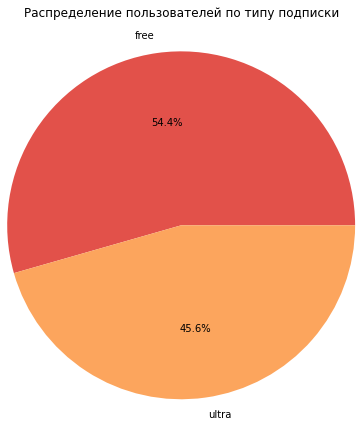

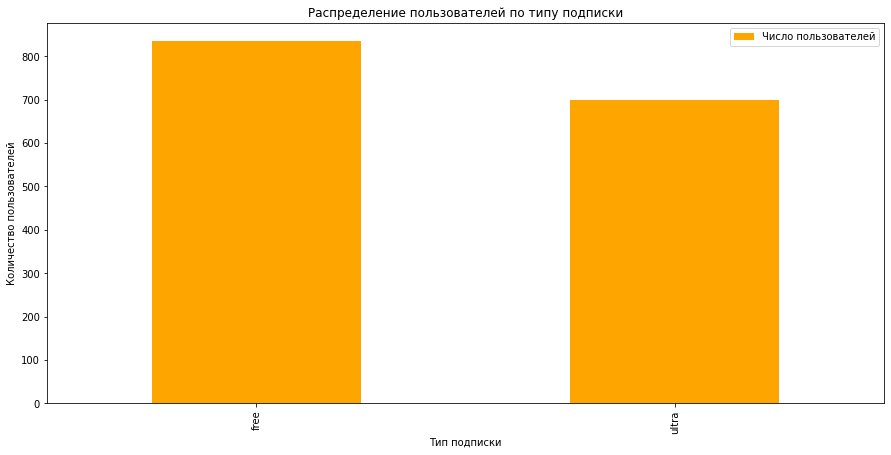

In [21]:
analyze_category(users_go, 
                 'subscription_type', 
                 'Распределение пользователей по типу подписки', 
                 'Тип подписки', 
                 'Количество пользователей')

##### Выводы по разделу
[К оглавлению](#Оглавление)

Как видно из диаграммы, пользователей с подпиской `ultra` меньше. Возможно, стоит предоставить таким пользователям больше привелегий: улучшить качество обслуживания, сделать бонусную программу и т.д. Это поможет увеличить количество пользователей с подпиской `ultra`

#### Возраст пользователей
[К оглавлению](#Оглавление)

,Число пользователей
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


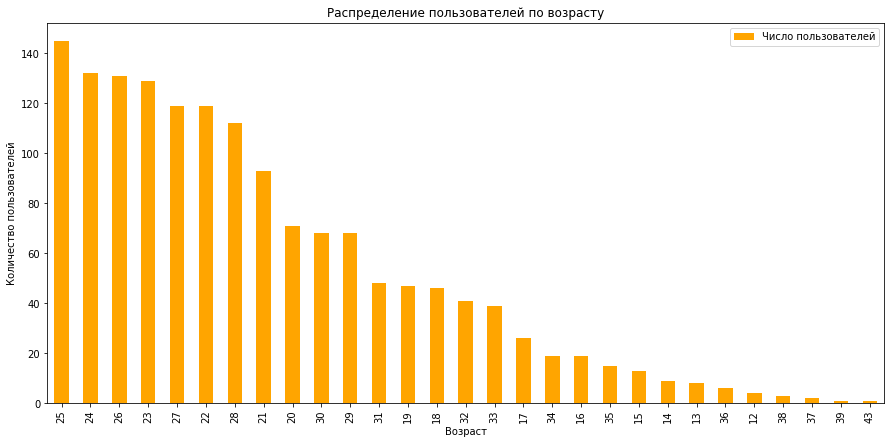

In [22]:
analyze_category(users_go, 'age',
                 'Распределение пользователей по возрасту', 
                 'Возраст', 
                 'Количество пользователей')

Найдём максимальный, минимальный и средний возраст пользователя

In [23]:
print(users_go['age'].describe())

print('\nМинимальный возраст пользователя: ', users_go['age'].min())
print('Максимальный возраст пользователя: ',users_go['age'].max())
print('Медианный возраст пользователя: ', round(users_go['age'].median(),3))

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Минимальный возраст пользователя:  12
Максимальный возраст пользователя:  43
Медианный возраст пользователя:  25.0


##### Выводы по разделу
[К оглавлению](#Оглавление)

- Больше всего пользователей имеют возраст 25 лет
- Меньше всего пользователей младше 18 и старше 32 лет
- Минимальный возраст пользователя:  12
- Максимальный возраст пользователя:  43
- Средний возраст пользователя:  25.0

Благодаря исследованию мы получили некоторый портрет нашего клиента: в основном, это молодые люди в возрасте от 18 до 32 лет.

Что, в целом, логично для такого вида транспорта, так как самокаты предназначены для взрослых, а также травмоопасны, поэтому люди старше 30 менее охотно берут их в аренду, а детям они не очень подходят по размеру.

#### Расстояние, которое пользователь преодолел за одну поездку
[К оглавлению](#Оглавление)


Максимальное значение:  7211.01

Минимальное значение:  0.86

Среднее значение:  3070.66

Медианное значение:  3133.61

Гистограмма


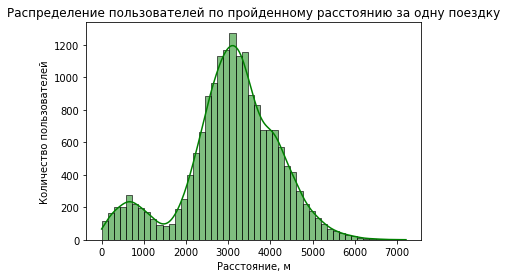

Диаграмма размаха


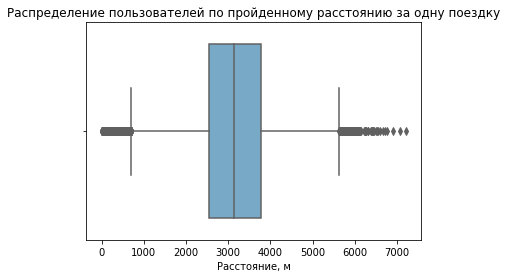


Топ 5 лидеров по среднему значению


,Количество поездок,Среднее
user_id,,
1309,8,4287.52
850,12,4004.84
644,3,3939.77
465,9,3917.56
381,8,3905.04



Топ 5 антилидеров по среднему значению


,Количество поездок,Среднее
user_id,,
908,8,1630.79
1495,5,1767.76
1433,10,1991.25
1011,13,2065.92
883,9,2094.47



Распределение средних значений в зависимости от месяца


,Количество поездок,Среднее
month,,
5,1560,3116.59
12,1527,3110.85
7,1529,3094.94
6,1553,3090.77
1,1585,3089.84
11,1418,3067.76
9,1517,3060.27
2,1336,3051.07
4,1506,3044.43


In [24]:
analyze_number(rides_go,
               'user_id',
               'distance',
               'month',
               'Распределение пользователей по пройденному расстоянию за одну поездку', 
               'Расстояние, м', 
               'Количество пользователей')

##### Выводы по разделу
[К оглавлению](#Оглавление)

Средняя длительность поездки составляет 3 км, основной диапазон значений от 2.5 до 3.5 км

Есть два локальных экстремума на  длине дистанции 0.5 км и 3 км. Это может объясняться тем, что пользователи делятся на две категории: для поездки из точки А в точку Б (тогда, когда пешком идти далековато, но для вызова такси слишком близко - долго ждать), а также тех, кто использует самокаты для прогулочных целей.

Максимальное значение 7.2 км, минимальное значение - менее 1 метра.

В целом, данные распределены равномерно, однако, странно, что показатели не имеют никакой сезонности в зависимости от месяца.

#### Продолжительность поездок
[К оглавлению](#Оглавление)


Максимальное значение:  40.82

Минимальное значение:  0.5

Среднее значение:  17.81

Медианное значение:  17.68

Гистограмма


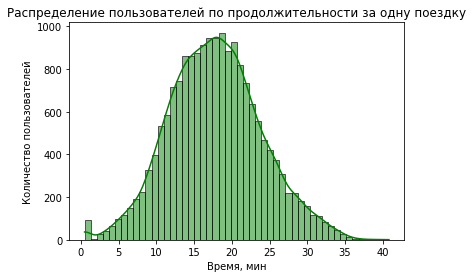

Диаграмма размаха


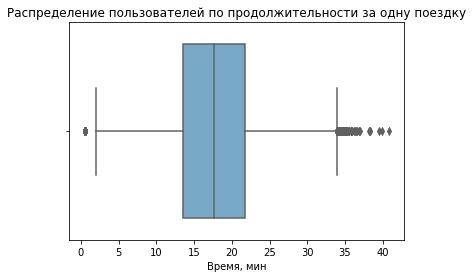


Топ 5 лидеров по среднему значению


,Количество поездок,Среднее
user_id,,
657,5,26.14
643,4,25.84
354,3,25.66
522,6,25.38
126,5,25.36



Топ 5 антилидеров по среднему значению


,Количество поездок,Среднее
user_id,,
908,8,11.16
73,3,11.39
1243,9,12.12
1256,9,12.82
801,8,12.86



Распределение средних значений в зависимости от месяца


,Количество поездок,Среднее
month,,
5,1560,18.04
6,1553,17.93
7,1529,17.91
4,1506,17.90
1,1585,17.84
12,1527,17.83
11,1418,17.80
9,1517,17.78
2,1336,17.71


In [25]:
analyze_number(rides_go,
               'user_id',
               'duration',
               'month',
               'Распределение пользователей по продолжительности за одну поездку', 
               'Время, мин', 
               'Количество пользователей')

**Минимальное значение 0.5 минут вызывает подозрения, возможно, в выборку попали значения с испытаний (например, приложения и функций системы оплаты) либо это пользователи, которые сразу отказались от поездки.**

Исследуем более подробно это явление. Для этого ограничим выборку для построения гистограммы 5-ю минутами.

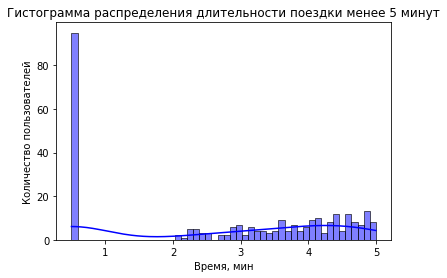

12013   0.50
15132   0.50
15492   0.50
10699   0.50
10698   0.50
10692   0.50
10650   0.50
10484   0.50
10457   0.50
10426   0.50
Name: duration, dtype: float64

In [26]:
sns.histplot(data=rides_go,
                 x=rides_go.query('duration < 5')['duration'],
                 bins=50,
                 kde = True,
                 color = 'Blue')
plt.title('Гистограмма распределения длительности поездки менее 5 минут')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.show()

rides_go.query('duration < 5')['duration'].sort_values().head(10)

Как видно, более 80 пользователей с подозрительно короткими поездками, при этом такие значения равны 0.5 минут. Также есть большой промежуток без значений между 30 секундами и 2 минутами.

Гипотезу с отказом пользователя от поездки мы не отвергаем, так как есть и поездки длительностью 2-5 минут.

Точных причин мы не знаем, но, по всей видимости, система регистрации длительности поездки записывает пользователей с поездкой менее 2 минут как 0.5 минут.Это может быть связано с переходными процессами (передача информации и запись данных в базу на сервере занимает время, поэтому логично, что разработчики решили сливать такие значения в одну "кучу"). Тем не менее, лучше уточнить у разработчиков.

Для дополнительной проверки гипотезы об отказе пользователей от поездки выясним, это были пользователи free или ultra (так как пользователи с подпиской ultra вряд ли откажутся от поездки, они уже пользовались сервисом ранее, отказ от поездки не выглядит резонным).

А также выясним, сколько всего таких значений и какое их соотношение к общему числу поездок для принятия решения о том, исказит ли это наше исследование. 

In [27]:
#Подсчитаем, сколько значений длительностью 0.5 минут
print('Количество поездок длительностью 0.5 минут: ', rides_go.query('duration == 0.5')['duration'].count())

Количество поездок длительностью 0.5 минут:  95


In [28]:
print('Общее число поездок: ',rides_go['duration'].count())

Общее число поездок:  18068


In [29]:
print('Соотношение числа поездок с длительностью 0.5 минут к общему числу поездок, % :' \
      ,round(rides_go.query('duration == 0.5')['duration'].count() / rides_go['duration'].count() * 100, 3))

Соотношение числа поездок с длительностью 0.5 минут к общему числу поездок, % : 0.526


In [30]:
thirty_seconds_to_analyze  = users_go.merge(rides_go, on='user_id')
print('Количество поездок длительностью 0.5 минут без подписки: ' \
      , thirty_seconds_to_analyze.query('(duration == 0.5) and (subscription_type == "free")')['duration'].count())
print('Количество поездок длительностью 0.5 минут с подпиской: ' \
      , thirty_seconds_to_analyze.query('(duration == 0.5) and (subscription_type == "ultra")')['duration'].count())

Количество поездок длительностью 0.5 минут без подписки:  95
Количество поездок длительностью 0.5 минут с подпиской:  0


Таким образом, наша гипотеза о том, что пользователи отказывались после оплаты ещё больше подтвердилась. 
Таких записей очень мало, поэтому их можно удалить после объединения данных, чтобы они не повлияли на результаты дальнейшего исследования

##### Выводы по разделу
[К оглавлению](#Оглавление)

Минимальное значение 0.5 минут вызывает подозрения, возможно, в выборку попали пользователи, которые сразу отказались от поездки. Гипотеза подтвердилась, т.к. это пользователи без подписки, но, тем не менее, желательно уточнить у разработчиков.
Таких значений всего 0.52% от общего числа, поэтому их можно удалить после объединения данных, чтобы они не повлияли на результаты дальнейшего исследования

В среднем поездка длится 17.81 минуты, что соответствует пройденному среднему расстоянию.

Подозрение вызывает также распределение среднего значения по месяцам.

#### Выводы по главе
[К оглавлению](#Оглавление)

Обобщим полученные в ходе исследования выводы:

Больше всего пользователей в г. Пятигорск, а меньше всего в Москве.

В целом, количество пользователей равномерно распределено по городам, что также вызывает подозрения, ведь города имеют разное население.

Возможно, количество самокатов в каждом городе  одинаковое и пользователей в городах с большим населением было бы больше, если бы у них были самокаты. 

Исследования возраста пользователей показало:
- Больше всего пользователей имеют возраст 25 лет
- Меньше всего пользователей младше 18 и старше 32 лет
- Минимальный возраст пользователя:  12
- Максимальный возраст пользователя:  43
- Средний возраст пользователя:  25.0

Благодаря исследованию мы получили некоторый портрет нашего клиента: в основном, это молодые люди в возрасте от 18 до 32 лет.

Что, в целом, логично для такого вида транспорта, так как самокаты предназначены для взрослых, а также травмоопасны, поэтому люди старше 30 менее охотно берут их в аренду, а детям они не очень подходят по размеру.

Что касается пройденному расстоянию и длительности поездки:

- Средняя длительность поездки составляет 3 км, основной диапазон значений от 2.5 до 3.5 км
- Есть два локальных экстремума на  длине дистанции 0.5 км и 3 км. Это может говорить о том, что пользователи используют самокаты для коротких перемещений от точки А до точки Б, но, в основном, самокаты используются для прогулок.

Максимальное значение 7.2 км, минимальное значение - менее 1 метра. Минимальное значение 0.5 минут вызывает подозрения, возможно, в выборку попали пользователи, которые сразу отказались от поездки. Гипотеза подтвердилась, т.к. это пользователи без подписки, но, тем не менее, желательно уточнить у разработчиков. Таких значений всего 0.52% от общего числа, поэтому их можно **удалить** после объединения данных, чтобы они не повлияли на результаты дальнейшего исследования

В среднем поездка длится 17.81 минуты, что соответствует пройденному среднему расстоянию.

В целом, данные распределены равномерно, однако, странно, что показатели не имеют никакой сезонности в зависимости от месяца.

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 6. Объединение данных
[К оглавлению](#Оглавление)

#### Объединение данных о пользователях, поездках и подписках в один датафрейм при помощи метода merge()
[К оглавлению](#Оглавление)

In [31]:
#объединим users_go и rides_go, т.к. они имеют общий столбец user_id и проверим, что получилось
#По умолчанию how='inner' объединяются только те значения, которые можно найти в обеих таблицах.
#Что нас вполне устраивает
data_merged = users_go.merge(rides_go, on='user_id')
display(data_merged.head(10))
data_merged.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [32]:
#теперь объединим с subscriptions_go
data_merged = data_merged.merge(subscriptions_go, on='subscription_type')
display(data_merged.head(10))
data_merged.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Проверим результаты объединения по количеству строк

In [33]:
print('Количество строк в users_go: ', len(users_go))
print('Количество строк в rides_go: ', len(rides_go))
print('Количество строк в subscriptions_go: ', len(subscriptions_go))

print('Количество строк в новой таблице: ', len(data_merged))

Количество строк в users_go:  1534
Количество строк в rides_go:  18068
Количество строк в subscriptions_go:  2
Количество строк в новой таблице:  18068


Количество строк совпадает, объединение прошло успешно.

В соответствии с выводами главы 5, исключим строки со значением длительности поездки 0.5 минут

In [34]:
data_merged = data_merged.query('duration != 0.5')
print('Количество строк в новой таблице: ', len(data_merged))
print('Строк исключено: ', len(rides_go) - len(data_merged))

Количество строк в новой таблице:  17973
Строк исключено:  95


#### Создание датафрейма c данными о пользователях без подписки
[К оглавлению](#Оглавление)

In [35]:
#для среза воспользуемся методом query()
data_merged_free = data_merged.query('subscription_type == "free"')
display(data_merged_free.head(10))
data_merged_free.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.00,22.37,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.33,18.24,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.55,15.42,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.11,16.77,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.54,11.31,2021-06-23,6,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   name               11473 non-null  object        
 2   age                11473 non-null  int64         
 3   city               11473 non-null  object        
 4   subscription_type  11473 non-null  object        
 5   distance           11473 non-null  float64       
 6   duration           11473 non-null  float64       
 7   date               11473 non-null  datetime64[ns]
 8   month              11473 non-null  int64         
 9   minute_price       11473 non-null  int64         
 10  start_ride_price   11473 non-null  int64         
 11  subscription_fee   11473 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


#### Создание датафрейма с данными о пользователях с подпиской
[К оглавлению](#Оглавление)

In [36]:
#для среза воспользуемся методом query()
data_merged_ultra = data_merged.query('subscription_type == "ultra"')
display(data_merged_ultra.head(10))
data_merged_ultra.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


#### Визуализизация информации о расстоянии и времени поездок для пользователей обеих категорий
[К оглавлению](#Оглавление)

##### Визуализизация информации о расстоянии для пользователей с подпиской `free` и `ultra`
[К оглавлению](#Оглавление)

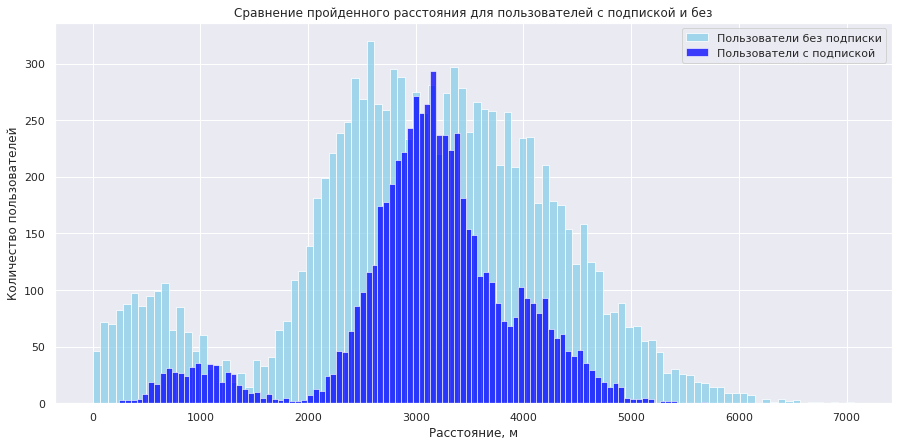

In [37]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.histplot(data=data_merged_free, x='distance', color="skyblue", label="Пользователи без подписки", bins=100)
sns.histplot(data=data_merged_ultra, x='distance', color="blue", label="Пользователи с подпиской", bins=100)
plt.legend() 
plt.title('Сравнение пройденного расстояния для пользователей с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Рассмотрим разницу между показателями данных

In [38]:
data_merged_ultra['distance'].describe() - data_merged_free['distance'].describe()

count   -4973.00
mean       87.07
std      -398.65
min       243.35
25%       424.57
50%        46.55
75%      -323.40
max     -1366.23
Name: distance, dtype: float64

##### Визуализизация информации о времени поездок для пользователей с подпиской `free` и `ultra`
[К оглавлению](#Оглавление)

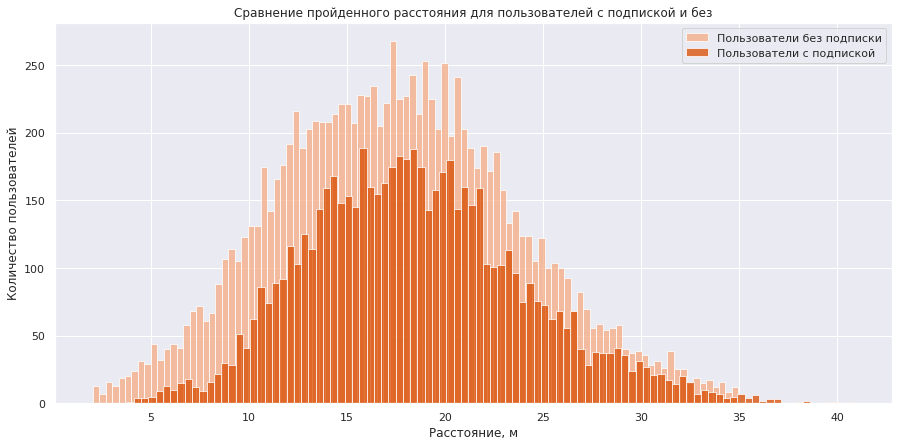

In [39]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.histplot(data=data_merged_free, x='duration', color="#f5ac84", label="Пользователи без подписки", bins=100)
sns.histplot(data=data_merged_ultra, x='duration', color="#d94d00", label="Пользователи с подпиской", bins=100)
plt.legend() 
plt.title('Сравнение пройденного расстояния для пользователей с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

In [40]:
data_merged_ultra['duration'].describe() - data_merged_free['duration'].describe()

count   -4973.00
mean        1.01
std        -0.59
min         1.72
25%         1.44
50%         0.79
75%         0.25
max         5.88
Name: duration, dtype: float64

#### Выводы по главе
[К оглавлению](#Оглавление)

На основе всех данных была создана новые таблицы:
- data_merged (собраны все данные)
- data_merged_free (все данные по пользователям без подписки)
- data_merged_ultra (все данные по пользователям с подпиской)

Выполнено исследование показателей пользователей с подпиской и без.
Рассмотрим основные показатели.
**Пользователи без подписки `free`**
- Расстояние:
    - Максимальное значение:  больше на 1366.23 м у пользователей без подписки
    - Минимальное значение:  больше на 243.35 м у пользователей с подпиской
    - Среднее значение: больше на 87.07 м у пользователей с подпиской
- Время: 
    - Максимальное значение:  больше на 5.88 мин у пользователей с подпиской
    - Минимальное значение: больше на 1.72 мин у пользователей с подпиской
    - Среднее значение:  больше на 1.01 мин у пользователей с подпиской
    
Как видно, вне зависимости от наличия подписки пользователи в среднем проезжают более 3 км со средним временем более 17 минут, но, тем не менее средние значения для пользователей с подпиской несколько выше.

Максимаальные показатели по пройденному расстоянию выше для пользователей без подписки, но это, скорее, исключение из правил, поэтому ориентироваться на такие показатели не стоит

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 7. Подсчёт выручки
[К оглавлению](#Оглавление)

#### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными
[К оглавлению](#Оглавление)

Найти за каждый месяц:
- суммарное расстояние;
- количество поездок;
- суммарное время для каждого пользователя за каждый месяц.

In [41]:
#округлим значения столбца time_sum
data_merged['duration'] = np.ceil(data_merged['duration']) 

"""
создадим сводную таблицу и выведем первые 10 строк
так как на значения дополнительных столбцов
'subscription_type',
'minute_price',
'start_ride_price',
'subscription_fee'
аггрегирующие функции min,max,mean и некоторые другие никак не повлияют, применим к ним функцию max
"""

data_merged_agg = data_merged.pivot_table(index=['month', 'user_id'],
                                          values=['distance',
                                                  'duration',
                                                  'subscription_type',
                                                  'minute_price',
                                                  'start_ride_price',
                                                  'subscription_fee'],
                                          aggfunc={'distance': ["count", "sum"],
                                                   'duration': ["sum"],
                                                   'subscription_type' : ["max"],
                                                   'minute_price' : ["max"],
                                                   'start_ride_price' : ["max"],
                                                   'subscription_fee' : ["max"]})
#Переименуем столбцы
data_merged_agg.columns =  ['count',
                            'dist_sum',
                            'time_sum', 
                            'minute_price', 
                            'start_ride_price',
                            'subscription_fee',
                            'subscription_type']
#Выведем на экран таблицу
data_merged_agg

count  dist_sum  time_sum  minute_price  start_ride_price  \
month user_id                                                              
1     1            2   7027.51     42.00             6                 0   
      3            1   3061.78     13.00             6                 0   
      5            1   3914.65     13.00             6                 0   
      7            2   6478.08     28.00             6                 0   
      12           1   3577.15     33.00             6                 0   
...              ...       ...       ...           ...               ...   
12    1525         1   4597.85     34.00             8                50   
      1526         1   3644.12     23.00             8                50   
      1528         1   3998.57     11.00             8                50   
      1532         2   6111.89     42.00             8                50   
      1534         1   2371.71     16.00             8                50   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra  
...                         ...               ...  
12    1525                    0              free  
      1526                    0              free  
      1528                    0              free  
      1532                    0              free  
      1534                    0              free  

[11300 rows x 7 columns]

Проверяем значения в столбцах

In [42]:
data_merged_agg['minute_price'].unique()

array([6, 8])

In [43]:
data_merged_agg['start_ride_price'].unique()

array([ 0, 50])

In [44]:
data_merged_agg['subscription_fee'].unique()

array([199,   0])

In [45]:
data_merged_agg['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [46]:
data_merged.query('(user_id  == 1) and (month == 1)').head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.00,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.00,2021-01-18,1,6,0,199


Проверка прошла  успешно, значения совпадают

#### Добавить столбец с помесячной выручкой, которую принёс каждый пользователь. 
[К оглавлению](#Оглавление)

Для этого необходимо обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [47]:
data_merged_agg['month_income'] = (data_merged_agg['start_ride_price'] * 
                                   data_merged_agg['count'] + 
                                   data_merged_agg['minute_price'] * 
                                   data_merged_agg['time_sum'] + 
                                   data_merged_agg['subscription_fee'])

data_merged_agg

count  dist_sum  time_sum  minute_price  start_ride_price  \
month user_id                                                              
1     1            2   7027.51     42.00             6                 0   
      3            1   3061.78     13.00             6                 0   
      5            1   3914.65     13.00             6                 0   
      7            2   6478.08     28.00             6                 0   
      12           1   3577.15     33.00             6                 0   
...              ...       ...       ...           ...               ...   
12    1525         1   4597.85     34.00             8                50   
      1526         1   3644.12     23.00             8                50   
      1528         1   3998.57     11.00             8                50   
      1532         2   6111.89     42.00             8                50   
      1534         1   2371.71     16.00             8                50   

               subscription_fee subscription_type  month_income  
month user_id                                                    
1     1                     199             ultra        451.00  
      3                     199             ultra        277.00  
      5                     199             ultra        277.00  
      7                     199             ultra        367.00  
      12                    199             ultra        397.00  
...                         ...               ...           ...  
12    1525                    0              free        322.00  
      1526                    0              free        234.00  
      1528                    0              free        138.00  
      1532                    0              free        436.00  
      1534                    0              free        178.00  

[11300 rows x 8 columns]

In [48]:
#Вручную проверим значения для первой строки
0*2+6*42+199

451

Проверка успешна

#### Выводы по главе
[К оглавлению](#Оглавление)

Выполнены задачи:
- найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Для этого подготовлена таблица `data_merged_agg`
- расчитана помесячная выручка

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 8. Проверка гипотез
[К оглавлению](#Оглавление)

#### Тратят ли пользователи с подпиской больше времени на поездки?
[К оглавлению](#Оглавление)

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Определим две гипотезы.**
- H<sub>0</sub>: `data_merged_free['duration']` = `data_merged_ultra['duration']`
- H<sub>1</sub>: `data_merged_free['duration']` < `data_merged_ultra['duration']`

Где:
- `data_merged_free['duration']` - время поездок без подписки
- `data_merged_ultra['duration']` - время поездок с подпиской

In [49]:
first_group_total = data_merged_ultra['duration']
second_group_total = data_merged_free['duration']
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.704468074453899e-28
Отвергаем нулевую гипотезу


Для проверки гипотез также выведем средние значения продолжительности поездок

In [50]:
print('Средняя продолжительность поездки пользователей без подписки: ',round(data_merged_free['duration'].mean(),2))
print('Средняя продолжительность поездки пользователей с подпиской: ',round(data_merged_ultra['duration'].mean(),2))
print('Соотношение, %:', round((1-data_merged_free['duration'].mean()/data_merged_ultra['duration'].mean())*100,2))

Средняя продолжительность поездки пользователей без подписки:  17.53
Средняя продолжительность поездки пользователей с подпиской:  18.54
Соотношение, %: 5.45


Как видно, разница внушительная

##### Выводы по разделу
[К оглавлению](#Оглавление)

Полученное значение p-value (1.2804098316645618e-34) меньше заданного уровня значимости alpha = 0.05, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

#### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
[К оглавлению](#Оглавление)

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Определим две гипотезы.**
- H<sub>0</sub>: `data_merged_ultra['distance']` = 3130
- H<sub>1</sub>: `data_merged_ultra['distance']` > 3130

Где:
- `data_merged_ultra['distance']` - расстояние, пройденное пользователями с подпиской


In [51]:
dataset = data_merged_ultra['distance']
interested_value = 3130 # проверяемое значение

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(dataset, 
                         interested_value,
                         alternative='greater') # метод st.ttest_1samp

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [52]:
print('Среднее расстояние за одну поездку пользователей без подписки: ',round(data_merged_free['distance'].mean(),2))
print('Среднее расстояние за одну поездку пользователей с подпиской: ',round(data_merged_ultra['distance'].mean(),2))
print('Соотношение, %:', round((1-data_merged_free['distance'].mean()/data_merged_ultra['distance'].mean())*100,2))

Среднее расстояние за одну поездку пользователей без подписки:  3028.37
Среднее расстояние за одну поездку пользователей с подпиской:  3115.45
Соотношение, %: 2.79


##### Выводы по разделу
[К оглавлению](#Оглавление)

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, статистически значимо не отличается от оптимального расстояния 3130 метров. Самокаты раньше времени ломаться не будут.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
[К оглавлению](#Оглавление)

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**Определим две гипотезы.**
- H<sub>0</sub>: `data_merged_agg['выручка без подписки']` = `data_merged_agg['выручка с подпиской']`
- H<sub>1</sub>: `data_merged_agg['выручка без подписки']` < `data_merged_agg['выручка с подпиской']`

Где:
- `data_merged_agg['выручка без подписки']` - помесячная выручка от пользователей без подписки
- `data_merged_agg['выручка с подпиской']` - помесячная выручка от пользователей с подпиской

In [53]:
first_group_total = data_merged_agg.query('subscription_type == "ultra"')['month_income']
second_group_total = data_merged_agg.query('subscription_type == "free"')['month_income']
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


In [54]:
print('Средняя выручка за месяц без подписки: ' \
      ,round(data_merged_agg.query('subscription_type == "free"')['month_income'].mean(),2))
print('Средняя выручка за месяц с подпиской: ' \
      ,round(data_merged_agg.query('subscription_type == "ultra"')['month_income'].mean(),2))
print('Соотношение, %:' \
      , round((1-data_merged_agg.query('subscription_type == "free"')['month_income'] \
      .mean()/data_merged_agg.query('subscription_type == "ultra"')['month_income'].mean())*100,2))

Средняя выручка за месяц без подписки:  329.33
Средняя выручка за месяц с подпиской:  362.79
Соотношение, %: 9.22


##### Выводы по разделу
[К оглавлению](#Оглавление)

Проверка гипотез показала, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

#### Количество обращений до и после обновления
[К оглавлению](#Оглавление)

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### Ответ
[К оглавлению](#Оглавление)

В данном случае будет применяться гипотеза о равенстве средних для зависимых (парных) выборок

**Определим две гипотезы.**
- H<sub>0</sub>: `количество обращений после обновления` = `количество обращений до обновления`
- H<sub>1</sub>: `количество обращений после обновления` >  `количество обращений до обновления`

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применяется метод `scipy.stats.ttest_rel()`, с набором данных до и после.

Код будет выглядеть примерно следующим образом:

`before = количество обращений до обновления`

`after = количество обращений после обновления`

`alpha = 0.05 # уровень статистической значимости`

`results = st.ttest_rel(before, after, alternative = 'greater')`

`print('p-значение:', results.pvalue)`

`if results.pvalue < alpha:`
    
    print('Отвергаем нулевую гипотезу о равенстве среднего веса посылок')
    
`else:`
    
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего веса посылок')

#### Выводы по главе
[К оглавлению](#Оглавление)

Обобщим полученные по разделам выводы:

**Тратят ли пользователи с подпиской больше времени на поездки?**
- Полученное значение p-value (1.2804098316645618e-34) меньше заданного уровня значимости alpha = 0.05, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

**Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**
- Проверка гипотезы показала, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров

**Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**
- Проверка гипотез показала, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

### Шаг 9. Распределения 
[К оглавлению](#Оглавление)

(необязательное задание) 
(к сожалению, на текущий момент не успеваю сделать)

#### Акция с раздачей промокодов на один бесплатный месяц подписки
[К оглавлению](#Оглавление)

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

##### Выводы по разделу
[К оглавлению](#Оглавление)

#### Push-уведомления в мобильном приложении
[К оглавлению](#Оглавление)

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

##### Выводы по разделу
[К оглавлению](#Оглавление)

#### Выводы по главе
[К оглавлению](#Оглавление)

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

## Общий вывод
[К оглавлению](#Оглавление)

Выполнен анализ данных: 

- Частота встречаемости городов;
    - Больше всего пользователей в г. Пятигорск, а меньше всего в Москве. В целом, количество пользователей равномерно распределено по городам, что также вызывает подозрения, ведь города имеют разное население. Возможно, количество самокатов в каждом городе одинаковое и пользователей в городах с большим населением было бы больше, если бы у них были самокаты.

- Соотношение пользователей с подпиской и без подписки;
    - Пользователей с подпиской ultra меньше. Возможно, стоит предоставить таким пользователям больше привелегий: улучшить качество обслуживания, сделать бонусную программу и т.д. Это поможет увеличить количество пользователей с подпиской ultra

- Возраст пользователей;
    - Больше всего пользователей имеют возраст 25 лет. Меньше всего пользователей младше 18 и старше 32 лет. Минимальный возраст пользователя: 12. Максимальный возраст пользователя: 43. Средний возраст пользователя: 25.0. Благодаря исследованию мы получили некоторый портрет нашего клиента: в основном, это молодые люди в возрасте от 18 до 32 лет. Что, в целом, логично для такого вида транспорта, так как самокаты предназначены для взрослых, а также травмоопасны, поэтому люди старше 30 менее охотно берут их в аренду, а детям они не очень подходят по размеру.

- Расстояние, которое пользователь преодолел за одну поездку;
    - Средняя длительность поездки составляет 3 км, основной диапазон значений от 2.5 до 3.5 км. Есть два локальных экстремума на длине дистанции 0.5 км и 3 км. Это можно объяснить тем, что пользователи используют самокаты для коротких поездок, в том случае, если пешком идти далеко, а для такси расстояние слишком маленькое и придётся его ждать. Во втором случае, вероятно, самокаты используются для прогулочных целей. Максимальное значение 7.2 км, минимальное значение - менее 1 метра. В целом, данные распределены равномерно, однако, странно, что показатели не имеют никакой сезонности в зависимости от месяца.

- Продолжительность поездок.
    - Минимальное значение 0.5 минут вызывает подозрения, возможно, в выборку попали значения пользователей, которые сразу отказались от поездки.Точных причин мы не знаем, но, по всей видимости, система регистрации длительности поездки записывает пользователей с поездкой менее 2 минут как 0.5 минут.Это может быть связано с переходными процессами (передача информации и запись данных в базу на сервере занимает время, поэтому логично, что разработчики решили объединить эти значения). Тем не менее, лучше уточнить данную информацию у разработчиков. Данные значение, ввиду их малочисленности, были исключены из данных в рамках проведения исследования. В среднем поездка длится 17.81 минуты, что соответствует пройденному среднему расстоянию. Подозрение вызывает также распределение среднего значения по месяцам.

Проверка гипотез, которые могут помочь бизнесу:

**Тратят ли пользователи с подпиской больше времени на поездки?**
- Полученное значение p-value (1.2804098316645618e-34) меньше заданного уровня значимости alpha = 0.05, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

- Средняя продолжительность поездки пользователей без подписки:  17.53
- Средняя продолжительность поездки пользователей с подпиской:  18.54
- Соотношение, % 5.45

**Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, статистически значимо не отличается от оптимального расстояния 3130 метров. Самокаты раньше времени ломаться не будут.

- Среднее расстояние за одну поездку пользователей без подписки:  3028.37
- Среднее расстояние за одну поездку пользователей с подпиской:  3115.45
- Соотношение, %: 2.79

**Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**
- Проверка гипотез показала, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

- Средняя выручка за месяц без подписки:  329.33
- Средняя выручка за месяц с подпиской:  362.79
- Соотношение, %: 9.22

**Ответить на вопрос заказчика:**
- Количество обращений до и после обновления. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае будет применяться гипотеза о равенстве средних для зависимых (парных) выборок

**Определим две гипотезы.**
- H<sub>0</sub>: `количество обращений после обновления` = `количество обращений до обновления`
- H<sub>1</sub>: `количество обращений после обновления` >  `количество обращений до обновления`

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применяется метод `scipy.stats.ttest_rel()`, с набором данных до и после.

Код будет выглядеть примерно следующим образом:

`before = количество обращений до обновления`

`after = количество обращений после обновления`

`alpha = 0.05 # уровень статистической значимости`

`results = st.ttest_rel(before, after, alternative = 'greater')`

`print('p-значение:', results.pvalue)`

`if results.pvalue < alpha:`
    
    print('Отвергаем нулевую гипотезу о равенстве среднего веса посылок')
    
`else:`
    
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего веса посылок')
    
В рамках достижения целей проекта решены следующие **задачи**:
- Исследована общая информация о датафреймах
- Выполнена предобработка данных
    - Обработка пропущенных значений (пропущенные значения не обнаружены)
    - Обработка неявных дубликатов (неявные дубликаты не обнаружены) 
    - Обработка явных дубликатов (явные дубликаты обнаружены, но в небольшом количестве)
    - Изменение типов данных (изменен тип данных в столбце с датами)
    - Создан новый столбей с номером месяца на основе столбца date
- Выполнен исследовательский анализ данных
- Осуществлено объединение данных по ТЗ заказчика
- Подсчет выручки по месяцам
- Осуществлена проверка гипотез